In [1]:
import pandas as pd
import numpy as np

In [2]:
ls

176-01-bikelocations.csv     features_ready.csv
176-01-ind_dublinalt.csv     fulldata-spoken.ipynb
176-01-ind_dublinalt.csv.gz  knn for neil.ipynb
176-01-sum_dublinalt.csv     machinestarts.ipynb
PORTOBELLO ROAD.csv          machinestarts2.ipynb
f_features.csv               pboh-features.ipynb
features2.csv                pboh.ipynb


In [3]:
df = pd.read_csv('features2.csv', parse_dates=True, index_col='timestamp')

In [4]:
df.head()

,bikes,spaces,month,day,weekday,hour,Minute,dayofyear,weeknumber,withdrawal_flag,deposit_flag
timestamp,,,,,,,,,,,
2011-03-02 06:20:02,0,0,3,2,3,6,20,61,9,0,0
2011-03-02 06:30:01,3,27,3,2,3,6,30,61,9,0,1
2011-03-02 06:40:02,3,27,3,2,3,6,40,61,9,0,0
2011-03-02 06:50:01,3,27,3,2,3,6,50,61,9,0,0
2011-03-02 07:00:03,3,27,3,2,3,7,0,61,9,0,0


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1136831 entries, 2011-03-02 06:20:02 to 2018-06-28 16:46:02
Data columns (total 11 columns):
bikes              1136831 non-null int64
spaces             1136831 non-null int64
month              1136831 non-null int64
day                1136831 non-null int64
weekday            1136831 non-null int64
hour               1136831 non-null int64
Minute             1136831 non-null int64
dayofyear          1136831 non-null int64
weeknumber         1136831 non-null int64
withdrawal_flag    1136831 non-null int64
deposit_flag       1136831 non-null int64
dtypes: int64(11)
memory usage: 104.1 MB


In [7]:
df.tail()

,bikes,spaces,month,day,weekday,hour,Minute,dayofyear,weeknumber,withdrawal_flag,deposit_flag
timestamp,,,,,,,,,,,
2018-06-28 16:38:02,7,23,6,28,4,16,38,179,26,0,0
2018-06-28 16:40:02,6,24,6,28,4,16,40,179,26,0,0
2018-06-28 16:42:03,8,22,6,28,4,16,42,179,26,0,0
2018-06-28 16:44:02,8,22,6,28,4,16,44,179,26,0,0
2018-06-28 16:46:02,8,22,6,28,4,16,46,179,26,0,0


In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
df.head(2)

,bikes,spaces,month,day,weekday,hour,Minute,dayofyear,weeknumber,withdrawal_flag,deposit_flag
timestamp,,,,,,,,,,,
2011-03-02 06:20:02,0,0,3,2,3,6,20,61,9,0,0
2011-03-02 06:30:01,3,27,3,2,3,6,30,61,9,0,1


In [22]:
scaler.fit(df.drop('deposit_flag', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [23]:
scaled_features = scaler.transform(df.drop('deposit_flag', axis=1))

In [24]:
scaled_features


array([[-1.35401875, -1.3294616 , -0.97178761, ..., -1.10892905,
        -1.09723166, -0.0465303 ],
       [-1.08525397,  1.08865564, -0.97178761, ..., -1.10892905,
        -1.09723166, -0.0465303 ],
       [-1.08525397,  1.08865564, -0.97178761, ..., -1.10892905,
        -1.09723166, -0.0465303 ],
       ...,
       [-0.63731268,  0.64085615, -0.10802917, ...,  0.00316521,
         0.02768967, -0.0465303 ],
       [-0.63731268,  0.64085615, -0.10802917, ...,  0.00316521,
         0.02768967, -0.0465303 ],
       [-0.63731268,  0.64085615, -0.10802917, ...,  0.00316521,
         0.02768967, -0.0465303 ]])

In [25]:
df_feat = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [26]:
df_feat.head()

,bikes,spaces,month,day,weekday,hour,Minute,dayofyear,weeknumber,withdrawal_flag
0,-1.354019,-1.329462,-0.971788,-1.570037,-0.00106,-0.795203,-0.477967,-1.108929,-1.097232,-0.04653
1,-1.085254,1.088656,-0.971788,-1.570037,-0.00106,-0.795203,0.098787,-1.108929,-1.097232,-0.04653
2,-1.085254,1.088656,-0.971788,-1.570037,-0.00106,-0.795203,0.675541,-1.108929,-1.097232,-0.04653
3,-1.085254,1.088656,-0.971788,-1.570037,-0.00106,-0.795203,1.252295,-1.108929,-1.097232,-0.04653
4,-1.085254,1.088656,-0.971788,-1.570037,-0.00106,-0.650715,-1.631474,-1.108929,-1.097232,-0.04653


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X = df_feat
y = df['deposit_flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn = KNeighborsClassifier(n_neighbors=3)

In [31]:
#need a majority to be able to classify

In [32]:
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [33]:
pred = knn.predict(X_test)

In [34]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[340323     30]
 [   672     25]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    340353
          1       0.45      0.04      0.07       697

avg / total       1.00      1.00      1.00    341050



In [37]:
error_rate = []

# Will take some time
for i in range(1,15):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

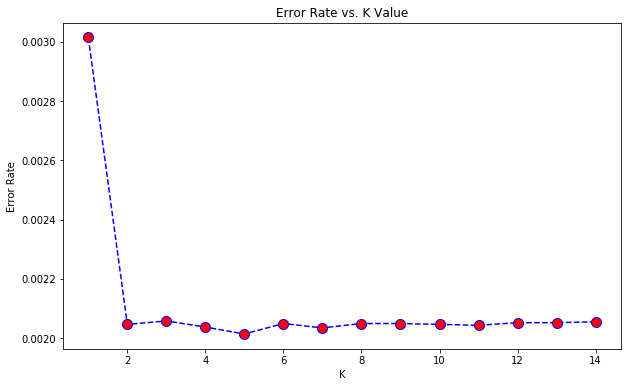

In [38]:
plt.figure(figsize=(10,6))
plt.plot(range(1,15),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

from sklearn.tree import DecisionTreeClassifier

In [39]:
knn = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski', p = 2)

In [40]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [41]:
pred = knn.predict(X_test)

In [42]:
pred

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[340323     30]
 [   672     25]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    340353
          1       0.45      0.04      0.07       697

avg / total       1.00      1.00      1.00    341050



In [ ]:

X = df_feat
y = df['deposit_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
    

In [ ]:
knn.fit(X_train, y_train)


In [ ]:
pred = knn.predict(X_test)

In [ ]:
pred


# print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 5

# import some data to play with
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF', '#AAAABB', '#AAAACC'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF', '#0000BB', '#0000CC'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

TypeError: unhashable type: 'slice'

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
from sklearn.tree import DecisionTreeClassifier

,bikes,spaces,month,day,weekday,hour,Minute,dayofyear,weeknumber,withdrawal_flag,deposit_flag
timestamp,,,,,,,,,,,
2011-03-02 06:20:02,0,0,3,2,3,6,20,61,9,0,0
2011-03-02 06:30:01,3,27,3,2,3,6,30,61,9,0,1


In [52]:
X = df.drop('deposit_flag', axis=1)

In [54]:
y = df['deposit_flag']

In [56]:
dtree = DecisionTreeClassifier()

In [57]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [59]:
predictions = dtree.predict(X_test)

In [60]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

[[339647    695]
 [   587    121]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    340342
          1       0.15      0.17      0.16       708

avg / total       1.00      1.00      1.00    341050



In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [71]:
#rfc = RandomForestClassifier(n_estimators=200)
mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)

In [63]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
rfc_pred = rfc.predict(X_test)

In [65]:
print(confusion_matrix(y_test, rfc_pred))
print(classification_report(y_test, rfc_pred))

[[340278     64]
 [   626     82]]
             precision    recall  f1-score   support

          0       1.00      1.00      1.00    340342
          1       0.56      0.12      0.19       708

avg / total       1.00      1.00      1.00    341050



In [73]:
mdl.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [77]:
mdl_pred = mdl.predict(X_test)

In [80]:
#print(confusion_matrix(y_test, mdl_pred))
#print(classification_report(y_test, mdl_pred))
print(mdl.feature_importances_)

[0.06917333 0.06307023 0.02934888 0.15253381 0.11533675 0.09237401
 0.16833854 0.22120973 0.0880684  0.00054632]


In [95]:
errors = abs(mdl_pred - y_test)

In [96]:
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.0 degrees.


In [90]:
print(mdl.predict(mdl_pred))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. ... 0. 0. 0.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [ ]:
clf2 = KNeighborsClassifier(n_neighbors=7)
clf2.fit(X, y)

In [ ]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
n_neighbors = 15


for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [ ]:

import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [ ]:
df.columns

In [ ]:
y_pred = knn.fit(X_train, y_train).predict(X_test)
class_names = df.columns

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=3)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
param_grid = {"n_estimators": [200, 500],
    "max_depth": [3, None],
    "max_features": [1, 3, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 10],
    "bootstrap": [True, False]}

In [105]:
model = RandomForestRegressor(random_state=42)
#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [114]:
model.score


<bound method RegressorMixin.score of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)>

In [113]:
model.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [123]:
accuracy = accuracy_score(y_test, pred)

In [122]:
from sklearn.metrics import accuracy_score

In [124]:
print(f'Mean accuracy score: {accuracy:.3}')

Mean accuracy score: 0.998


In [ ]:
regressor = RandomForestRegressor(random_state=0, n_estimators=200, max_depth=None, max_features=3, 
                                  min_samples_leaf=1, min_samples_split=2, bootstrap=False)


In [ ]:
regressor.fit(X_train, y_train)

In [ ]:
regressor.score(X_test, y_test)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
plt.scatter(x=y_test, y=y_pred)

In [ ]:
plt.show()

In [ ]:
import seaborn as sns

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['business', 'health']); ax.yaxis.set_ticklabels(['health', 'business']);